In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### airbnb 숙소 선호도를 확인하고 숙소예약에 영향을 주는 요소가 무엇인지를 파악하기 위함

##### 유의미한 분석이 가능한 cloumns 

- price 숙박 요금 
    - 가격이 예약률에 미치는 영향 분석

- service fee 서비스 요금
    - 추가 요금이 고객 선택에 미치는 영향

- neighbourhood group 숙소 지역 그룹
    - 인기 지역 파악

- neighbourhood group 구체적인 지역
    - 선호 지역 분석

- room type 숙소 유형
    - 숙소 유형별 예약 선호도

- minimum nights 최소 숙박일 수
    - 최소 숙박일이 예약에 미치는 영향

- number of reviews 숙소 리뷰 수
    - 	숙소의 인기 척도

- reviews per month 월별 리뷰 수
    -최근 숙소 이용 빈도 분석

- review rate number 리뷰 평점(1~5점)
    -	평점이 예약률에 미치는 영향 분석

- availability 365 연중 예약 가능 일수
    -가용성이 높은 숙소가 더 인기 있는지 분석

- host_identity_verified 호스트 신원 인증 여부
    - 신뢰도가 높은 숙소가 더 선호되는지 확인

In [4]:
# 1. 데이터 로드
airbnb_df = pd.read_csv('./data/Airbnb_Open_Data.csv',low_memory=False)

In [5]:
# 2. 데이터 구조 및 기초 통계 확인
# df.head(), df.info(), df.describe()

airbnb_df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
airbnb_df.columns #열 확인

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
airbnb_df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
# 3. 결측치 및 이상치 탐색
# df.isnull.sum(), df.boxplot()

airbnb_df.isnull().sum()

#결측치 많은 순서
# icense(거의 결측),house_rules(약 50% 결측),last review, reviews per month

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [10]:
airbnb_df.shape

(102599, 26)

In [17]:
# 이상치 탐색 - 숫자형 컬럼만 

columns_to_check = ['price', 'service fee', 'minimum nights', 'number of reviews', 
                    'reviews per month', 'review rate number', 'availability 365']

airbnb_df['price'] = airbnb_df['price'].replace(r'[\$,]', '', regex=True).astype(float)
airbnb_df['service fee'] = airbnb_df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)

#price 열에서 $ 와 , 제거 / regex 정규표현식 사용해 $1,000 -> 1000 으로 변환 ,데이터 실수로 변환 
#r'[\$,]'처럼 r을 추가하여 정규 표현식을 raw string 으로 만들어 특수문자 인식


airbnb_df['price'] = pd.to_numeric(airbnb_df['price'], errors='coerce')
airbnb_df['service fee'] = pd.to_numeric(airbnb_df['service fee'], errors='coerce')

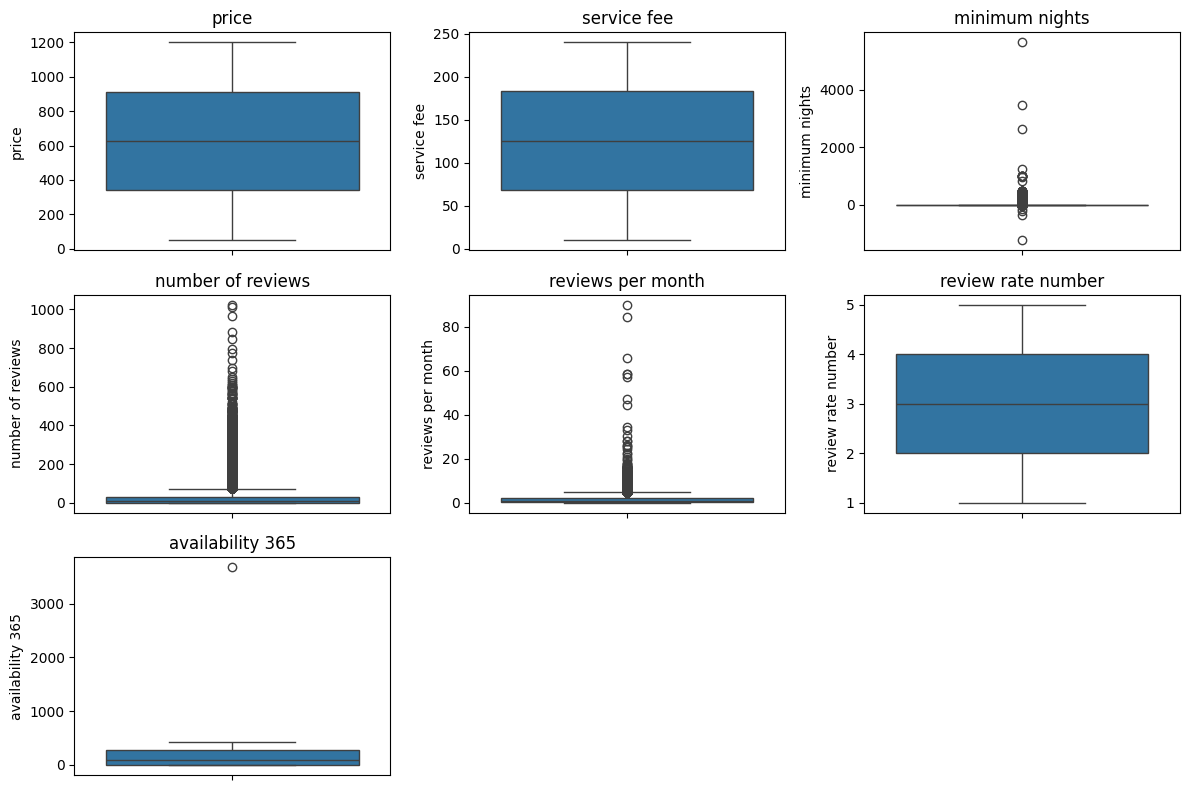

In [21]:
plt.figure(figsize=(12, 8))  # 전체 그래프 크기 설정

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # 3x3 서브플롯으로 배치 (최대 9개 컬럼)
    sns.boxplot(y=airbnb_df[col])  # 각 컬럼별 박스플롯
    plt.title(col)  # 제목 추가

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

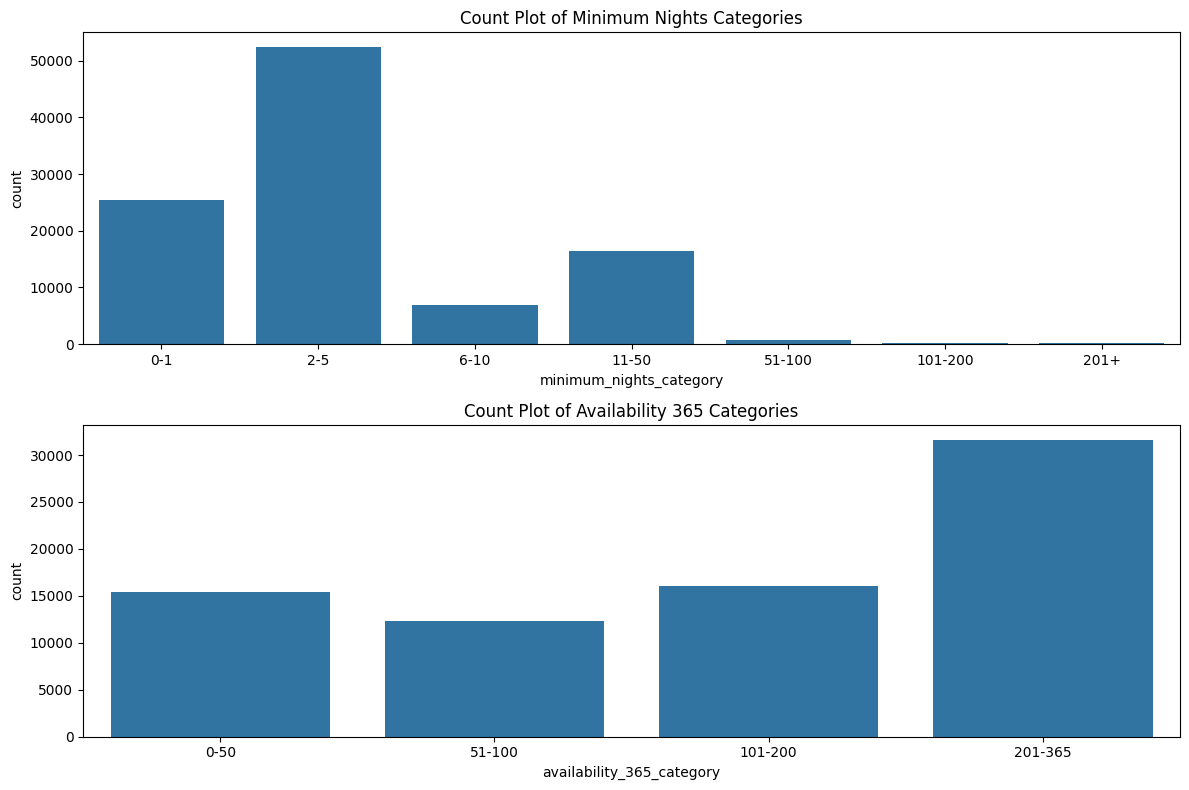

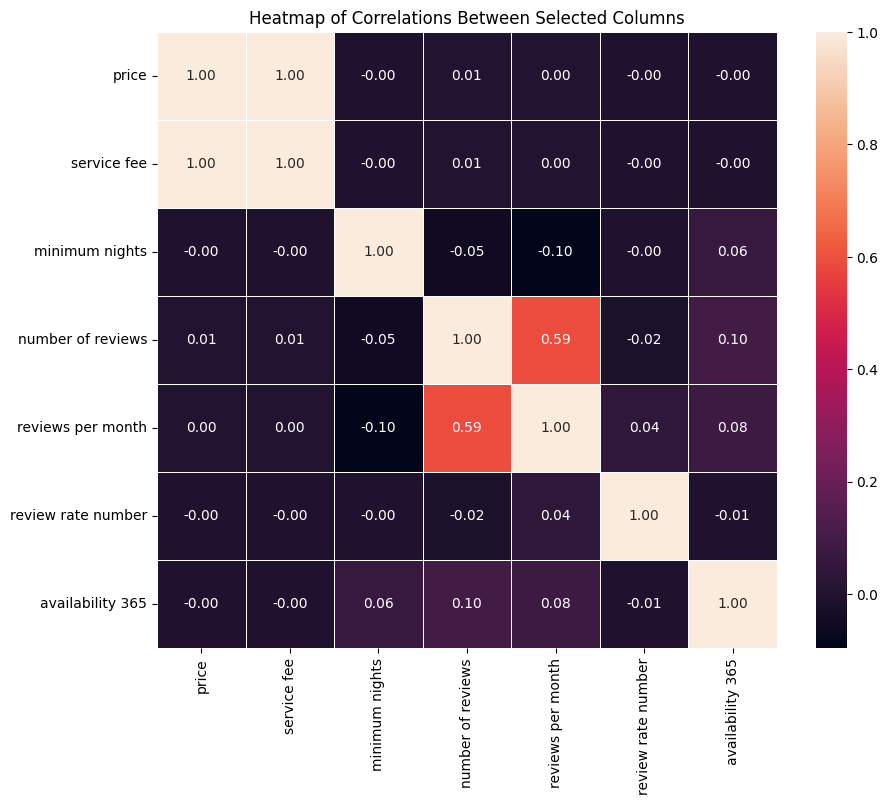

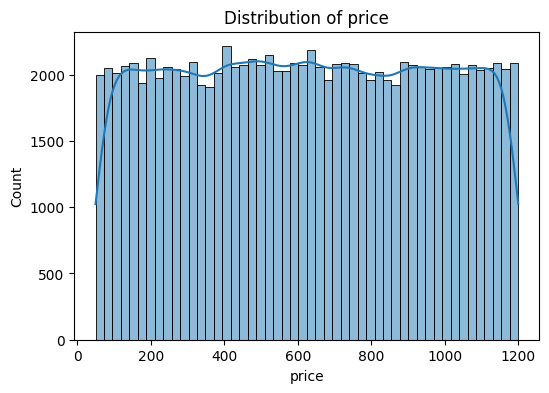

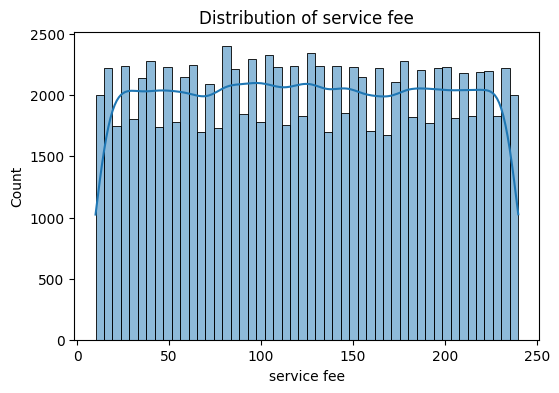

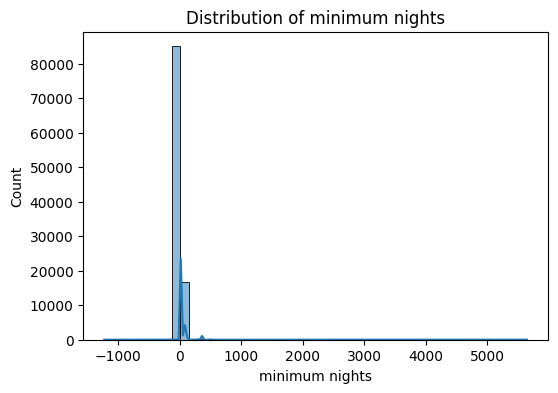

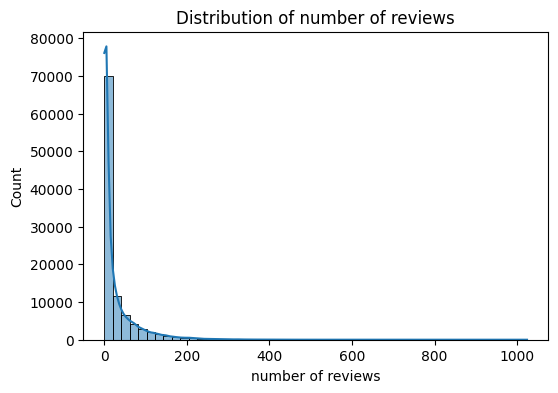

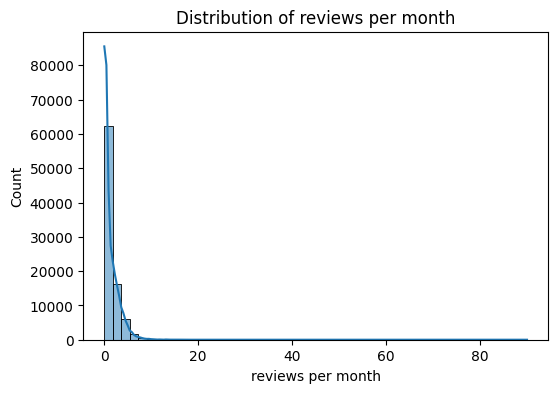

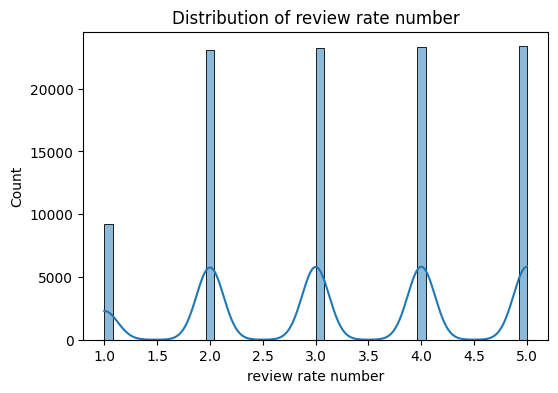

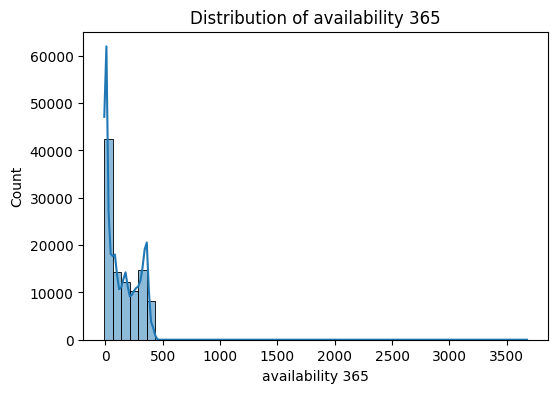

In [ ]:
# 4. 데이터 시각화를 통한 탐색
# sns.countplot(), sns.heatmap()

# 'minimum nights'와 'availability 365'를 범주형으로 변환하여 countplot(각 구간에 속하는 항목 개수 새고 -> 막대그래프) 사용 
# ~category의 새로운 컬럼을 만들어 labels 로 구간을 나눔 
airbnb_df['minimum_nights_category'] = pd.cut(airbnb_df['minimum nights'], bins=[0, 1, 5, 10, 50, 100, 200, 1000], labels=['0-1', '2-5', '6-10', '11-50', '51-100', '101-200', '201+'])
airbnb_df['availability_365_category'] = pd.cut(airbnb_df['availability 365'], bins=[0, 50, 100, 200, 365], labels=['0-50', '51-100', '101-200', '201-365'])

# 'countplot'을 사용하여 범주형 데이터 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# minimum nights category countplot
sns.countplot(x='minimum_nights_category', data=airbnb_df, ax=axes[0])
axes[0].set_title("Count Plot of Minimum Nights Categories")

# availability 365 category countplot
sns.countplot(x='availability_365_category', data=airbnb_df, ax=axes[1])
axes[1].set_title("Count Plot of Availability 365 Categories")

plt.tight_layout()
plt.show()

# 'price', 'service fee', 'minimum nights', 'number of reviews', 
# 'reviews per month', 'review rate number', 'availability 365'의 상관 관계 시각화
correlation_matrix = airbnb_df[['price', 'service fee', 'minimum nights', 'number of reviews', 
                                'reviews per month', 'review rate number', 'availability 365']].corr()

# Heatmap으로 상관 행렬 시각화
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Heatmap of Correlations Between Selected Columns")
plt.show()

# 'price', 'service fee', 'number of reviews' 등 연속형 변수들의 분포 시각화 (histplot)
for column in ['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365']:
    plt.figure(figsize=(6, 4))
    sns.histplot(airbnb_df[column], bins=50, kde=True)
    #bins = 히스토그램의 구간 kde = 밀도 추정선선
    plt.title(f"Distribution of {column}")
    plt.show()


<Figure size 1200x800 with 0 Axes>

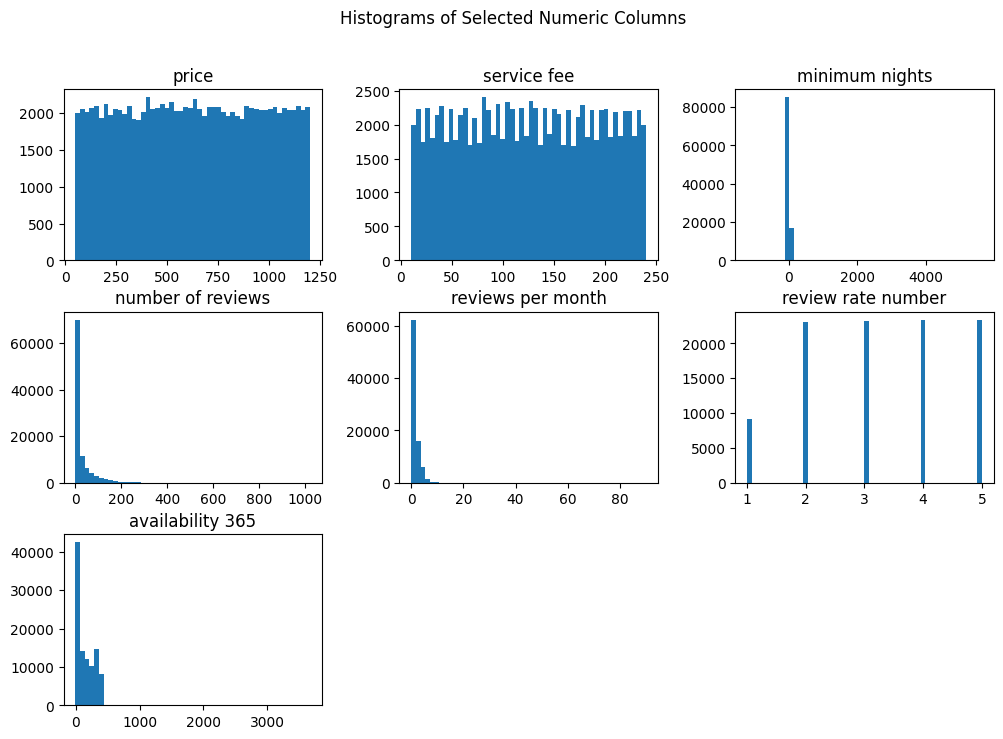

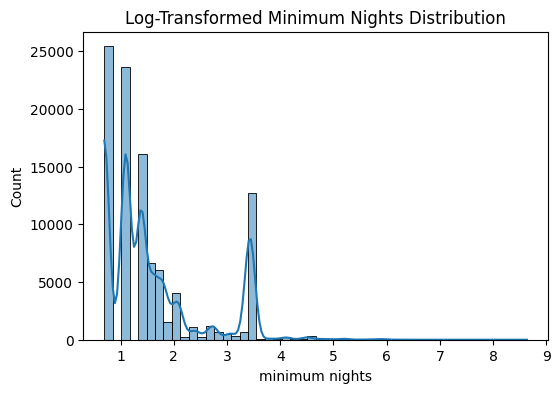

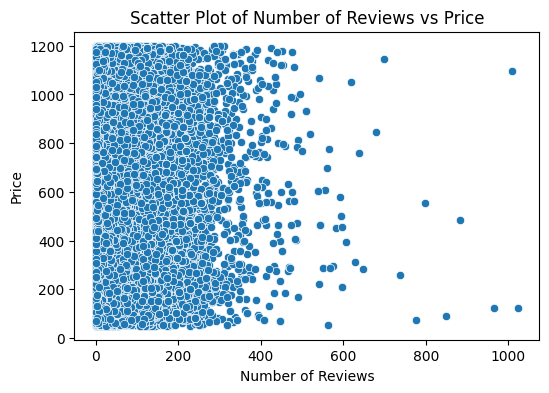

In [22]:
# 히스토그램을 통한 데이터 분포 확인
plt.figure(figsize=(12, 8))
airbnb_df[columns_to_check].hist(bins=50, figsize=(12, 8), grid=False)
plt.suptitle("Histograms of Selected Numeric Columns")
plt.show()

# 이상치가 많은 'minimum nights'에 대한 로그 변환 후 히스토그램
plt.figure(figsize=(6, 4))
sns.histplot(airbnb_df[airbnb_df['minimum nights'] > 0]['minimum nights'].apply(lambda x: np.log1p(x)), bins=50, kde=True)
plt.title("Log-Transformed Minimum Nights Distribution")
plt.show()

# 산점도를 통한 'number of reviews' vs 'price' 관계 확인
plt.figure(figsize=(6, 4))
sns.scatterplot(x=airbnb_df['number of reviews'], y=airbnb_df['price'])
plt.title("Scatter Plot of Number of Reviews vs Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

In [ ]:
# 5. 데이터 정제 및 전처리
# df.drop(), df.fillina,pd.get_dummies()